In [ ]:
# Import Dependecies
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sklearn



In [ ]:
# Connect to google drive if using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load images in folder and return images as a list
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
    return images

In [ ]:
# Upload sets
imagesNew = load_images_from_folder("/content/drive/MyDrive/Modern")
imagesOld = load_images_from_folder("/content/drive/MyDrive/Traditional")

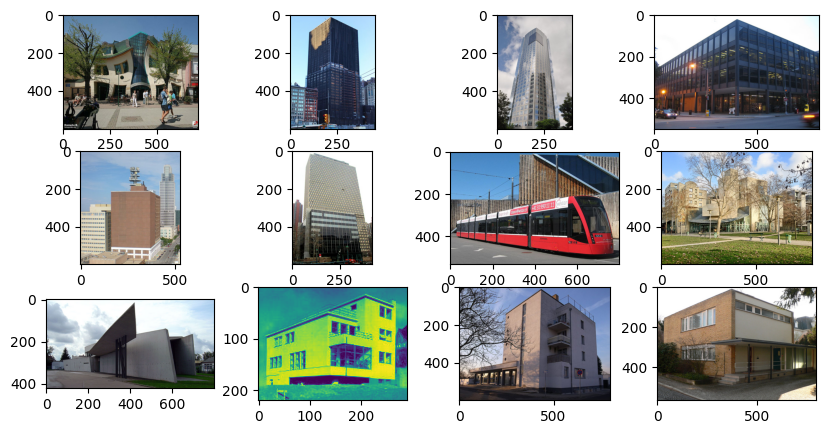

In [ ]:
fig = plt.figure(figsize=(10, 5))
rows = 3
columns = 4

# Displays the first images from your list
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagesNew[i-1])
plt.show()

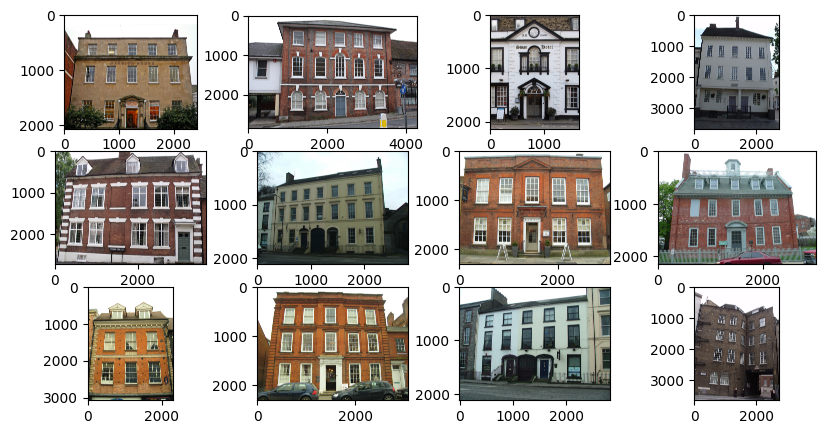

In [ ]:
fig = plt.figure(figsize=(10, 5))
rows = 3
columns = 4

# Displays the first images from your list
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imagesOld[i-1])
plt.show()

In [ ]:
# Convert images to numpy arrays
numpy_imagesNew = [np.array(img) for img in imagesNew]

# Example: resizing images to 100x100
resized_imagesNew = []
for img in numpy_imagesNew:
    resized_img = cv2.resize(img, (50, 50))
    if resized_img.shape == (50, 50, 3):
        resized_imagesNew.append(resized_img)
  
# Example: normalize pixel values to [0, 1]
resized_imagesNewNorm = [img / 255.0 for img in resized_imagesNew]
NewTensor = np.stack(resized_imagesNewNorm, axis=0)

# Generate list of 0's to serve as label in data set
# Tudor = 1
New = [0]*NewTensor.shape[0]

# Check size and shape of tensors
NewTensor.shape

(632, 50, 50, 3)

In [ ]:
len(New)

632

In [ ]:
# Convert images to numpy arrays
numpy_imagesOld = [np.array(img) for img in imagesOld]

# Example: resizing images to 100x100
resized_imagesOld = []
for img in numpy_imagesOld:
    resized_img = cv2.resize(img, (50, 50))
    if resized_img.shape == (50, 50, 3):
        resized_imagesOld.append(resized_img)

# Example: normalize pixel values to [0, 1]
numpy_imagesOldNorm = [img / 255.0 for img in resized_imagesOld]
OldTensor = np.stack(numpy_imagesOldNorm, axis=0)

# Generate list of 0's to serve as label in data set
# Tudor = 1
Old = [1]*OldTensor.shape[0]

# Check size and shape of tensors
OldTensor.shape

(938, 50, 50, 3)

In [ ]:
len(Old)

938

In [ ]:
X = np.concatenate((NewTensor, OldTensor))
y = np.concatenate((New, Old))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = keras.Sequential([
    keras.layers.Conv2D(50, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50
40/40 [==============================] - 7s 126ms/step - loss: 0.6591 - accuracy: 0.6330
Epoch 2/50
40/40 [==============================] - 3s 84ms/step - loss: 0.4886 - accuracy: 0.7787
Epoch 3/50
40/40 [==============================] - 3s 84ms/step - loss: 0.3734 - accuracy: 0.8487
Epoch 4/50
40/40 [==============================] - 4s 103ms/step - loss: 0.2942 - accuracy: 0.8949
Epoch 5/50
40/40 [==============================] - 5s 119ms/step - loss: 0.2454 - accuracy: 0.9124
Epoch 6/50
40/40 [==============================] - 3s 86ms/step - loss: 0.1908 - accuracy: 0.9323
Epoch 7/50
40/40 [==============================] - 5s 117ms/step - loss: 0.1379 - accuracy: 0.9689
Epoch 8/50
40/40 [==============================] - 5s 134ms/step - loss: 0.1177 - accuracy: 0.9721
Epoch 9/50
40/40 [==============================] - 3s 86ms/step - loss: 0.0960 - accuracy: 0.9833
Epoch 10/50
40/40 [==============================] - 3s 83ms/step - loss: 0.0721 - accuracy: 0.9889
Epoc

In [15]:
model.save('ModernVTraditional.js')